### 목표 : 다중 속성/피쳐를 기반으로 수치값 예측
- 데이터 : fish.csv
- 피쳐 : 4개 Length, Diagonal, Height, Width
- 타겟 : 수치값 Weight
- 학습유형 : 지도학습 + 회귀
- 알고리즘 : 데이터를 확인 후 결정

### (1) 모듈 로딩 및 데이터 준비 <hr>

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [181]:
# 데이터 준비
data_file = '../data/fish.csv'

# Bream 행만 추출 => 35개 행만 추출
dataDF = pd.read_csv(data_file, nrows=35, usecols=[1,2,3,4,5])

In [182]:
# 기본 정보
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


### (2) 데이터 확인 <hr>
- 결측치, 이상치 없어서 넘어감
- 타겟과 피쳐 관계 => 상관계수, 시각화

In [183]:
# 피쳐와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 및 출력
# 매개변수 : 행 수, 열 수, 타겟, 피쳐리스트, 상관계수 값
# 반환 : 없음

def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target],df[features[idx]], label=f'corr:{corrs[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout
    plt.show()

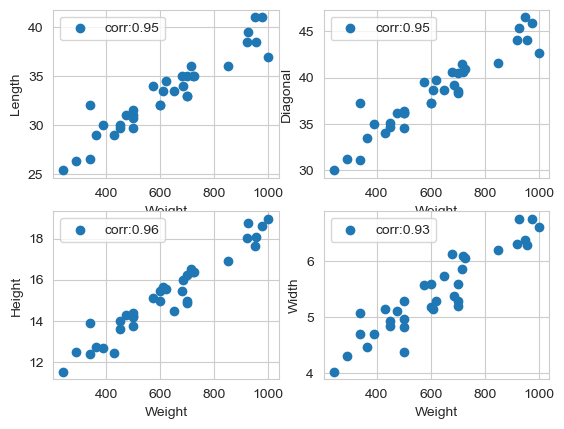

In [184]:
corrList = dataDF.corr()['Weight'].to_list()
print_feature(2, 2, dataDF, dataDF.columns[0], dataDF.columns[1:], corrList[1:])


### (3) 학습 진행 <hr>
- 학습 알고리즘 : 양의 선형관계 파악됨 => 선형 모델
- 학습 데이터 준비 : 피처-타겟 분리, 학습용 데이터셋 - 테스트용 데이터셋
- 피쳐 값의 범위 비교 : 작은 범위 최대값 8~ 큰 범위 최대값 50 => 피쳐 스케일링

#### (3-1) 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋 - 테스트용 데이터셋

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [186]:
# 피쳐와 타겟 분리

featureDf = dataDF[dataDF.columns[1:]]
targetDF = dataDF.Weight

In [187]:
# 데이터셋 준비
X_train, X_test, y_train, y_test = train_test_split(featureDf,
                                                    targetDF,
                                                    random_state=22,
                                                    test_size=0.3)

In [188]:
print(f'[훈련용] X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'[테스트용] X_test : {X_test.shape}, y_test : {y_test.shape}')

[훈련용] X_train : (24, 4), y_train : (24,)
[테스트용] X_test : (11, 4), y_test : (11,)


#### (3-2) 피쳐 스케일링 ==> 훈련데이터로 생

In [189]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [190]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [191]:
rb_scaler = RobustScaler()
rb_scaler.fit(X_train)

RobustScaler()

In [192]:
# 3가지 버전에 스케일된 데이터셋 준비
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

X_train_rb = rb_scaler.transform(X_train)
X_test_rb = rb_scaler.transform(X_test)


### (4) 학습 진행 <hr>

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
model = LinearRegression()
model.fit(X_train_std, y_train)

# print(f'[모델 파라미터]\ncoef_ :{model.coef_}\nintercept_ : {model.intercept_}')

# predict 식
# y= LengthModel*coef_[0] + DiagonalModel*coef_[1] + Height*coef_[2] + Width*coef_[3] + intercept_

LinearRegression()

### (5) 모델 평가 <hr>
- 훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
    - 훈련 점수 > 테스트 점수 : 과대적합
    - 훈련 점수▼, 테스트 점수▼ : 과소적합
    - 훈련 점수 ≒ 테스트 점수 : 최적적합 

In [195]:
std_train_score = model.score(X_train_std, y_train)
std_test_score = model.score(X_test_std, y_test)

print(f'Train Score : {std_train_score} --- Test Score : {std_test_score}')

Train Score : 0.9407426856768842 --- Test Score : 0.9237664570648871


In [196]:
mm_train_score = model.score(X_train_mm, y_train)
mm_test_score = model.score(X_test_mm, y_test)

print(f'Train Score : {mm_train_score} --- Test Score : {mm_test_score}')

Train Score : 0.19687617375625155 --- Test Score : 0.4359646967535715


In [197]:
rb_train_score = model.score(X_train_rb, y_train)
rb_test_score = model.score(X_test_rb, y_test)

print(f'Train Score : {rb_train_score} --- Test Score : {rb_test_score}')

Train Score : 0.9344330986703795 --- Test Score : 0.9342002057490968


In [198]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [199]:
# y_pre = model.predict()
# y_pre = np.round(y_pre,1)
# y_pre

1) StandardScaler() : Train_score : 94.07% --- Test Score : 92.38% 	 Fit :  -1.70%(과대적합)
	Predict_score : 92.38%


TypeError: float() argument must be a string or a number, not 'StandardScaler'

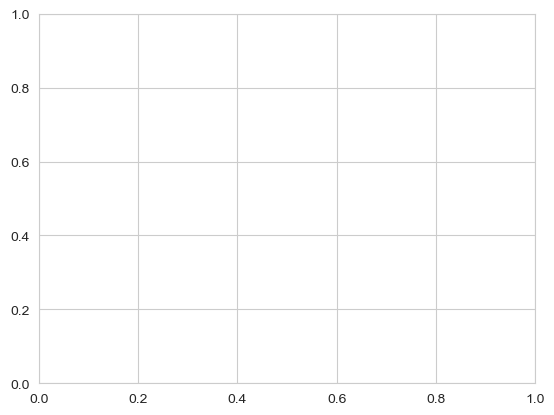

In [201]:
def fLinearTrainScore(X_train, X_test, y_train, y_test):
    '''
    model : 모델 객체 선형
    ScalerList : 스케일러 종류
    scaler : 스케일링 인수 획득 - 평균, 표준편차 등 획득
    STD : 평균 0, 편차 1, MM : 최소 0, 최대 1, RB : 중앙값0, IQR 1,
    train, test : 스케일링 진행 - 스케일링 인수 활용
    model.fit : 모델에 스케일링 값 학습
    train_score, test_score : 모델의 점수 평가
    return scaler
    '''
    model = LinearRegression()
    ScalerList = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    for idx, i in enumerate(ScalerList):
        scaler = i
        scaler.fit(X_train)
        train = scaler.transform(X_train)
        test = scaler.transform(X_test)
        model.fit(train, y_train)
        train_score = model.score(train, y_train)
        test_score = model.score(test, y_test)
        pred_test = model.predict(test)
        print(f'{idx+1}) {i} : Train_score : {train_score*100:.2f}% --- Test Score : {test_score*100:.2f}%', end=' ')
        print(f'\t Fit :  {(test_score-train_score)*100:.2f}%', end='')
        if train_score > test_score:
            print('(과대적합)')
        elif test_score<50 and train_score < 50:
            print('(과소적합)')
        else:
            print()
        print(f'\tPredict_score : {test_score*100:.2f}%')



fLinearTrainScore(X_train, X_test, y_train, y_test)